<a href="https://colab.research.google.com/github/SidrahAaishah/Ml-practice/blob/main/car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
car_dataset = pd.read_csv('car data.csv')

In [ ]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
car_dataset['Fuel_Type'].value_counts()

,count
Fuel_Type,
Petrol,239
Diesel,60
CNG,2


In [ ]:
car_dataset['Seller_Type'].value_counts()

,count
Seller_Type,
Dealer,195
Individual,106


In [ ]:
car_dataset['Transmission'].value_counts()

,count
Transmission,
Manual,261
Automatic,40


In [ ]:
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2},'Seller_Type':{'Dealer':0,'Individual':1},'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

/tmp/ipython-input-4115635482.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2},'Seller_Type':{'Dealer':0,'Individual':1},'Transmission':{'Manual':0,'Automatic':1}},inplace=True)


<Axes: >

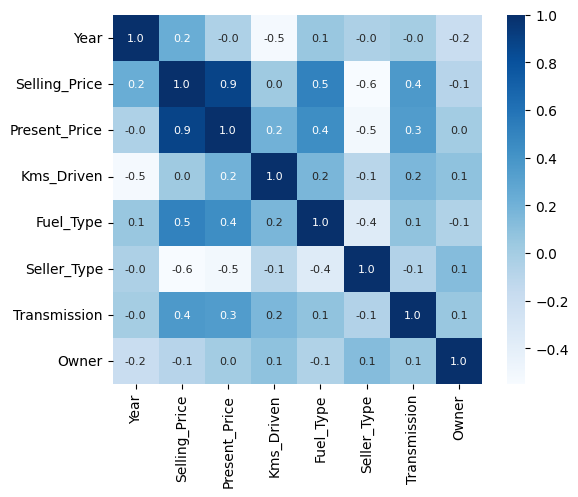

In [ ]:
correlation = car_dataset.drop('Car_Name', axis=1).corr()
sns.heatmap(correlation,cmap='Blues',fmt='0.1f',square=True,annot_kws={'size':8},annot=True,cbar=True)

In [ ]:
X = car_dataset.drop(['Selling_Price', 'Car_Name'], axis=1)
y = car_dataset['Selling_Price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.1,random_state = 2)

In [ ]:
linear_reg_model = LinearRegression()


In [ ]:
linear_reg_model.fit(X_train,y_train)

LinearRegression()

In [ ]:
training_prediction = linear_reg_model.predict(X_train)

In [ ]:
error_score = metrics.r2_score(y_train,training_prediction)
error_score

0.8799451660493711

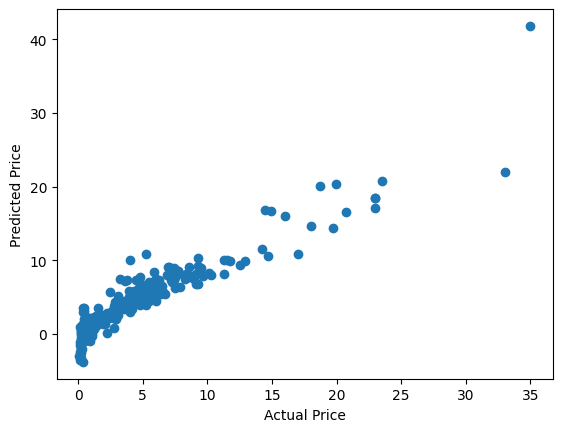

In [ ]:
plt.scatter(y_train,training_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

In [ ]:
test_prediction = linear_reg_model.predict(X_test)

In [ ]:
error_score2 = metrics.r2_score(y_test,test_prediction)
error_score2

0.8365766715027051

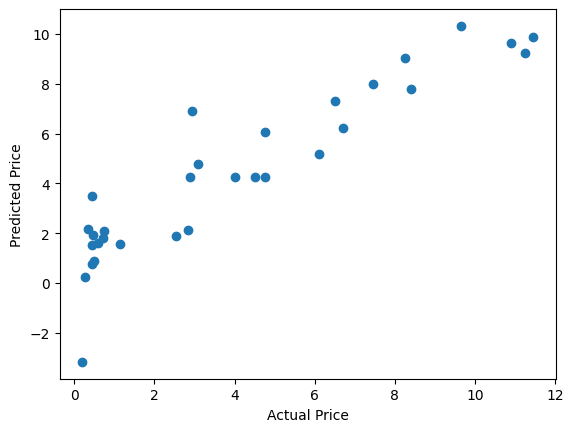

In [ ]:
plt.scatter(y_test,test_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

In [ ]:
#linear regression works well in the positive correlation values

Lasso Regression

In [ ]:
lasso_reg_model = Lasso()


In [ ]:
lasso_reg_model.fit(X_train,y_train)

Lasso()

In [ ]:
training_prediction = lasso_reg_model.predict(X_train)

In [ ]:
error_score = metrics.r2_score(y_train,training_prediction)
error_score

0.8427856123435794

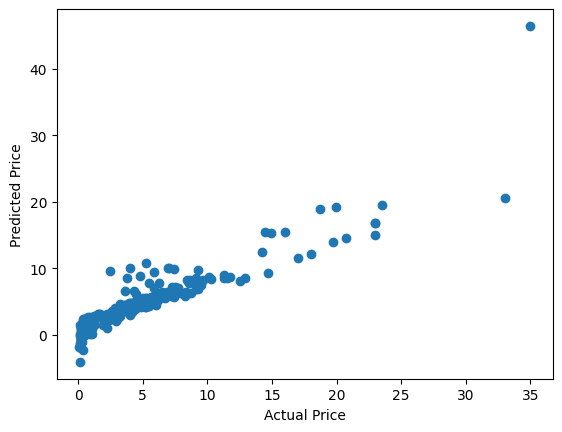

In [ ]:
plt.scatter(y_train,training_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

In [ ]:
test_prediction = lasso_reg_model.predict(X_test)

In [ ]:
error_score21 = metrics.r2_score(y_test,test_prediction)
error_score21

0.8709167941173195

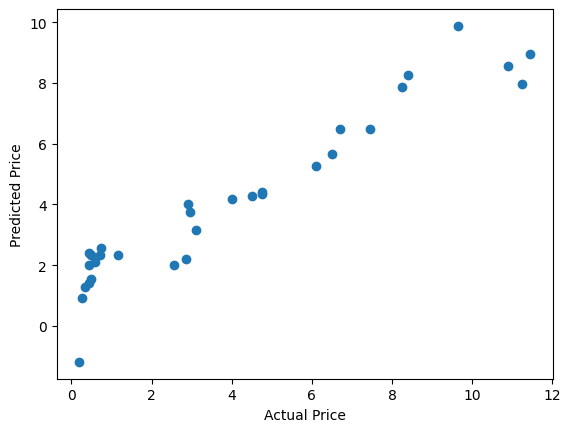

In [ ]:
plt.scatter(y_test,test_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()